### COURSERA | IBM DATA SCIENCE | K-MEANS CLUSTERING
The purpose of this program is to implement k-means clustering to develop a simple model for analyzing unlabeled data.

In [1]:
import numpy as np
import pandas as pd

#### PART 1: PREPARE DATA & CLUSTER FUNCTIONS

In [2]:
import random
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
x1 = [-4.9, -3.5, 0, -4.5, -3, -1, -1.2, -4.5, -1.5, -4.5, -1, -2, -2.5, -2, -1.5, 4, 1.8, 2, 2.5, 3, 4, 2.25, 1, 0, 1, 2.5, 5, 2.8, 2, 2]
x2 = [-3.5, -4, -3.5, -3, -2.9, -3, -2.6, -2.1, 0, -0.5, -0.8, -0.8, -1.5, -1.75, -1.75, 0, 0.8, 0.9, 1, 1, 1, 1.75, 2, 2.5, 2.5, 2.5, 
      2.5, 3, 6, 6.5]

In [4]:
colors_map = np.array(['b', 'r'])
def assign_members(x1, x2, centers):
    first_center = np.sqrt(np.square(np.array(x1) - centers[0][0]) + np.square(np.array(x2) - centers[0][1]))
    second_center = np.sqrt(np.square(np.array(x1) - centers[1][0]) + np.square(np.array(x2) - centers[1][1]))
    class_of_points = first_center > second_center
    colors = colors_map[class_of_points + 1 - 1]
    return colors, class_of_points

In [5]:
def update_centers(x1, x2, class_of_points):
    center1 = [np.mean(np.array(x1)[~class_of_points]), np.mean(np.array(x2)[~class_of_points])]
    center2 = [np.mean(np.array(x1)[class_of_points]), np.mean(np.array(x2)[class_of_points])]
    return [center1, center2]

#### PART 2: PLOT DATA POINTS & CLUSTER CENTROIDS 

In [6]:
def plot_points(centroids=None, colors='g', figure_title=None):
    fig = plt.figure(figsize=(15, 10)) 
    ax = fig.add_subplot(1, 1, 1)
    
    centroid_colors = ['bx', 'rx']
    if centroids:
        for (i, centroid) in enumerate(centroids):
            ax.plot(centroid[0], centroid[1], centroid_colors[i], markeredgewidth=5, markersize=20)
    plt.scatter(x1, x2, s=500, c=colors)
    
    xticks = np.linspace(-6, 8, 15, endpoint=True)
    yticks = np.linspace(-6, 6, 13, endpoint=True)

    ax.set_xticks(xticks)
    ax.set_yticks(yticks)

    xlabels = xticks
    ax.set_xticklabels(xlabels)
    ylabels = yticks
    ax.set_yticklabels(ylabels)

    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    ax.tick_params('both', length=2, width=1, which='major', labelsize=15)
    
    ax.set_xlabel('x1', fontsize=20)
    ax.set_ylabel('x2', fontsize=20)
    ax.set_title(figure_title, fontsize=24)
    plt.show()

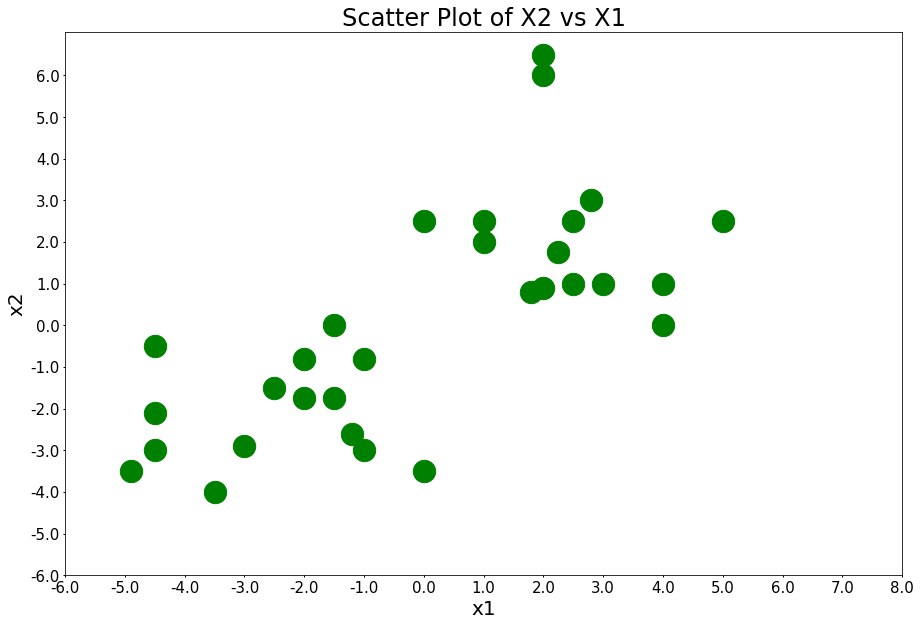

In [7]:
plot_points(figure_title='Scatter Plot of X2 vs X1')

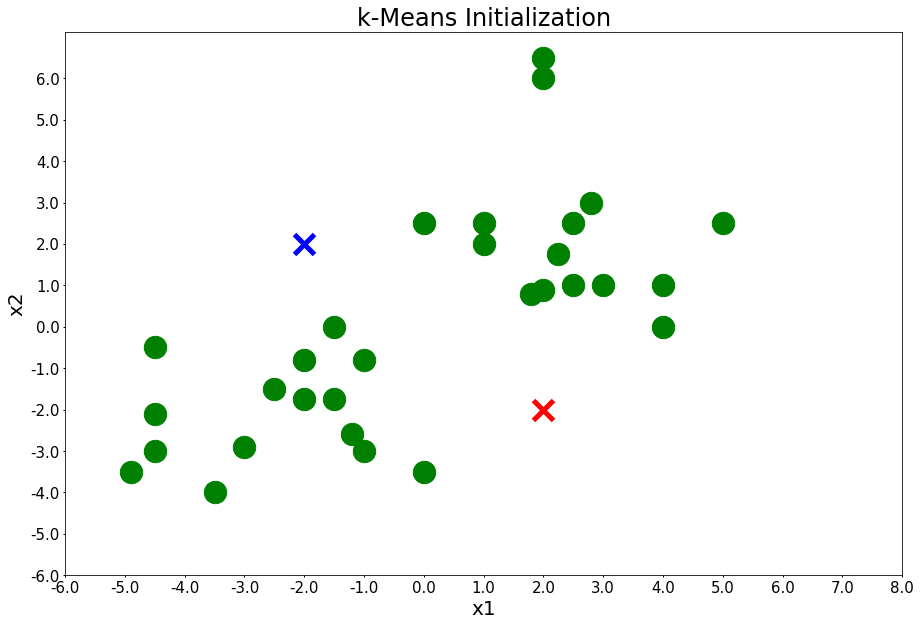

In [8]:
centers = [[-2, 2], [2, -2]]
plot_points(centers, figure_title='k-Means Initialization')

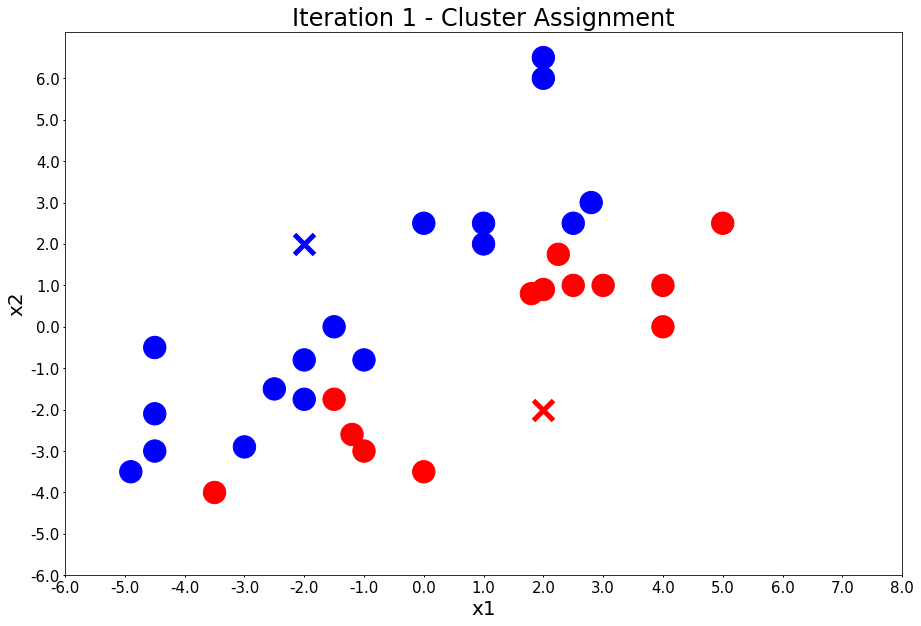

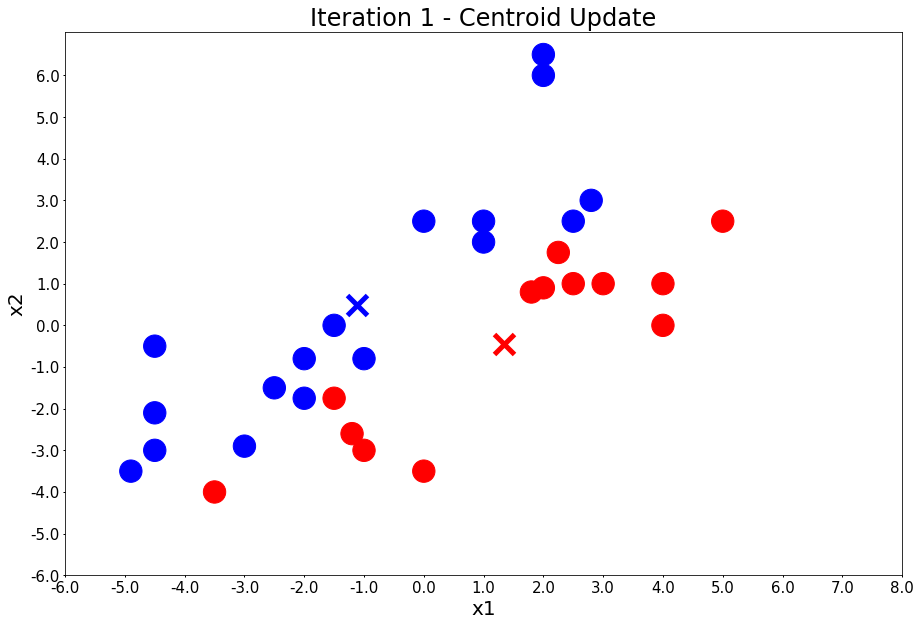

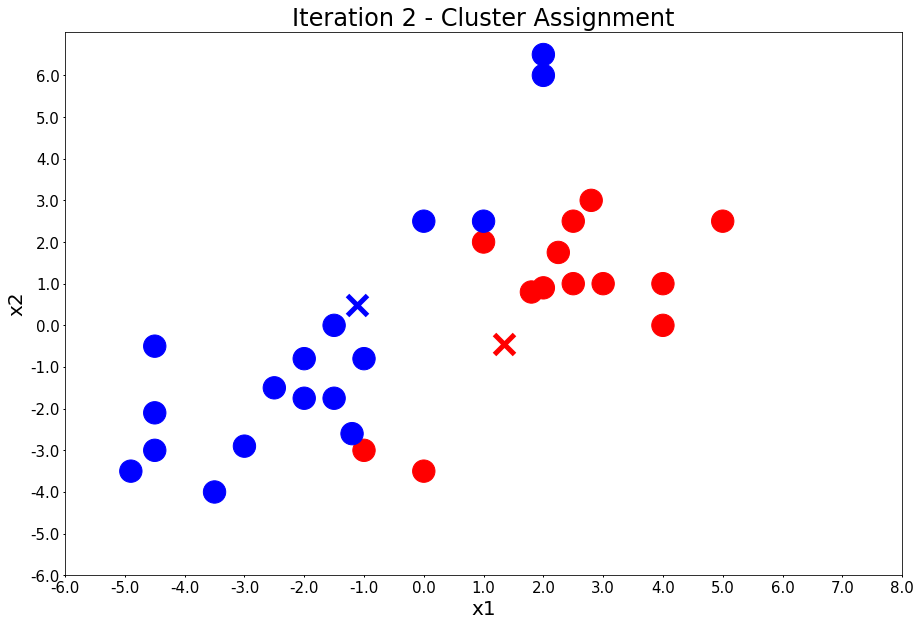

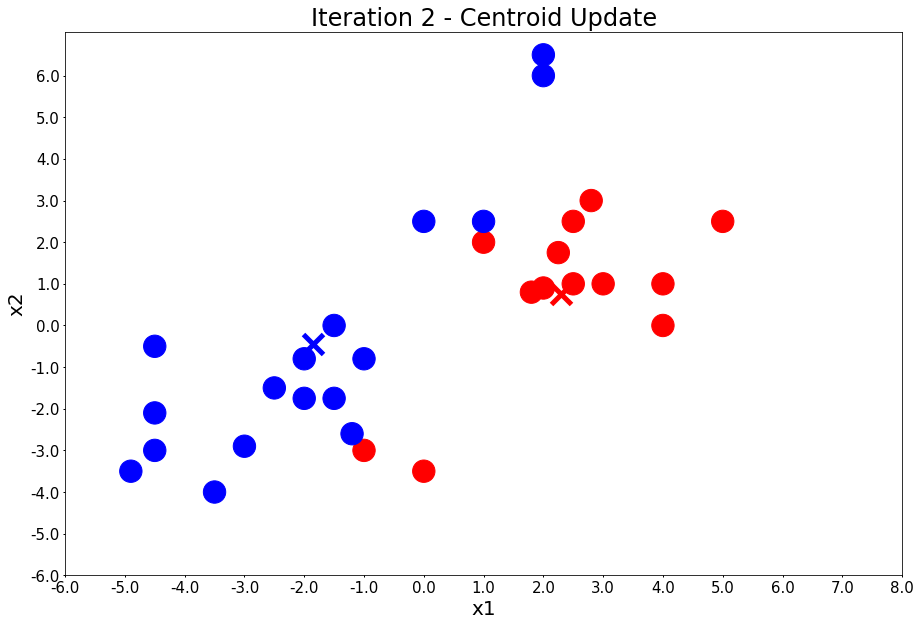

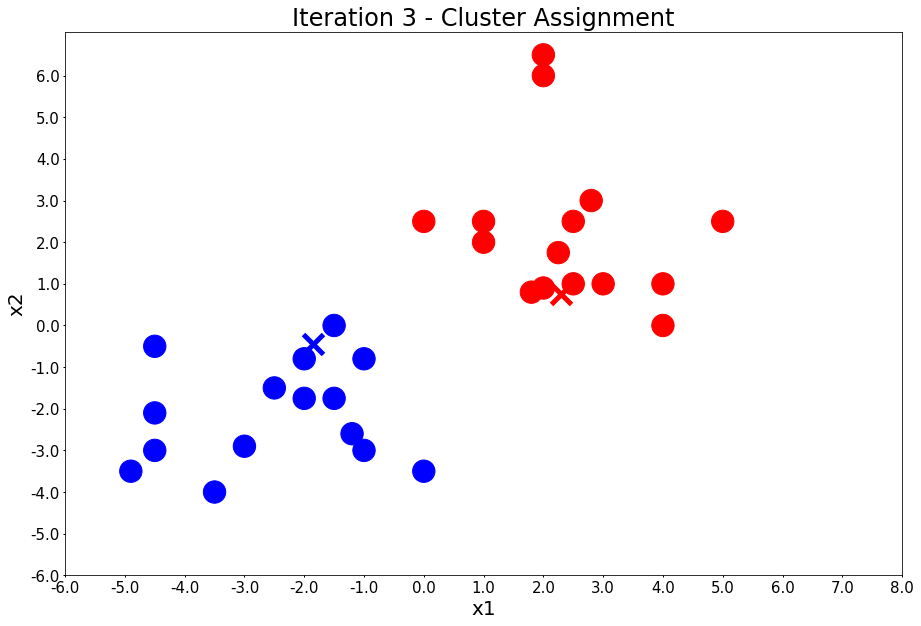

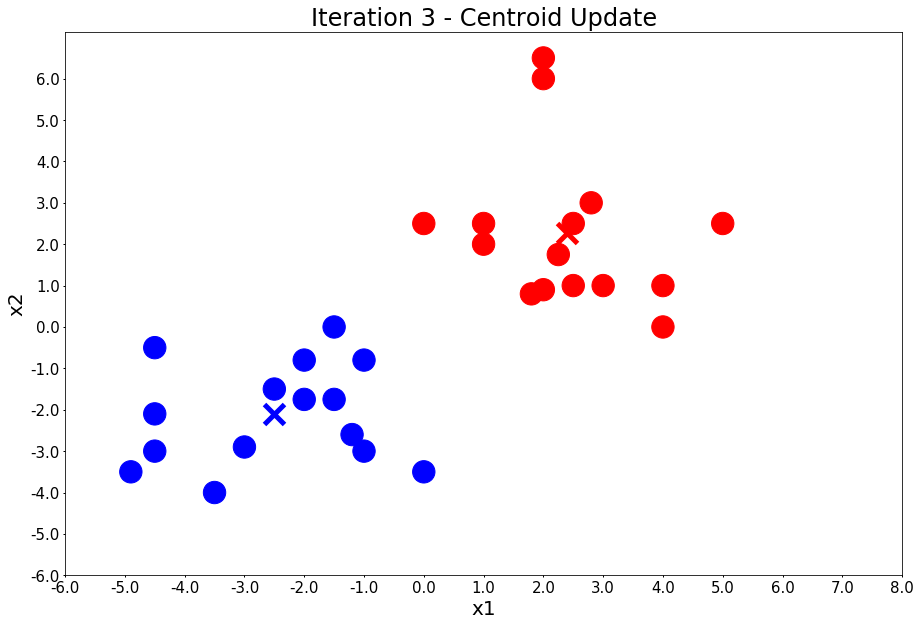

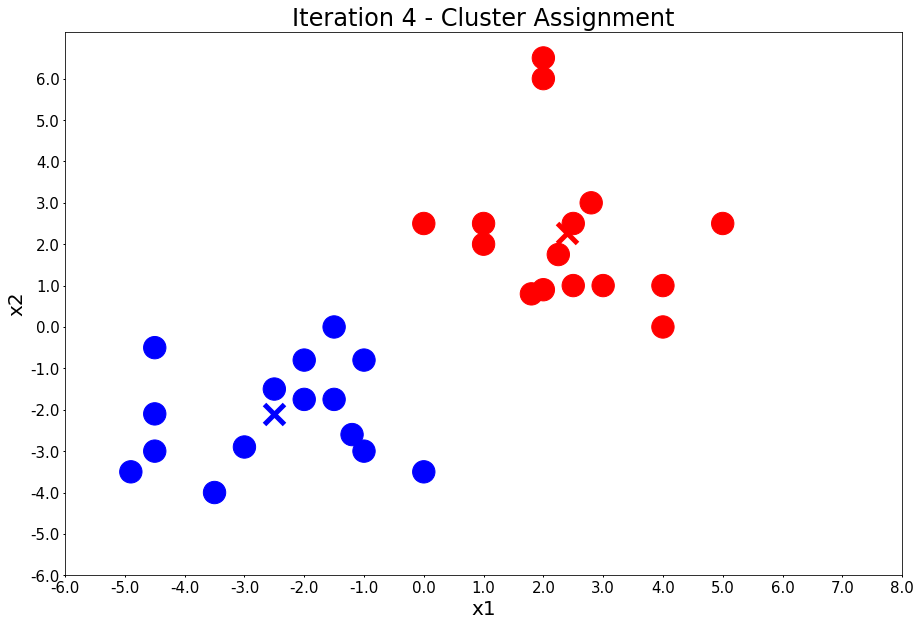

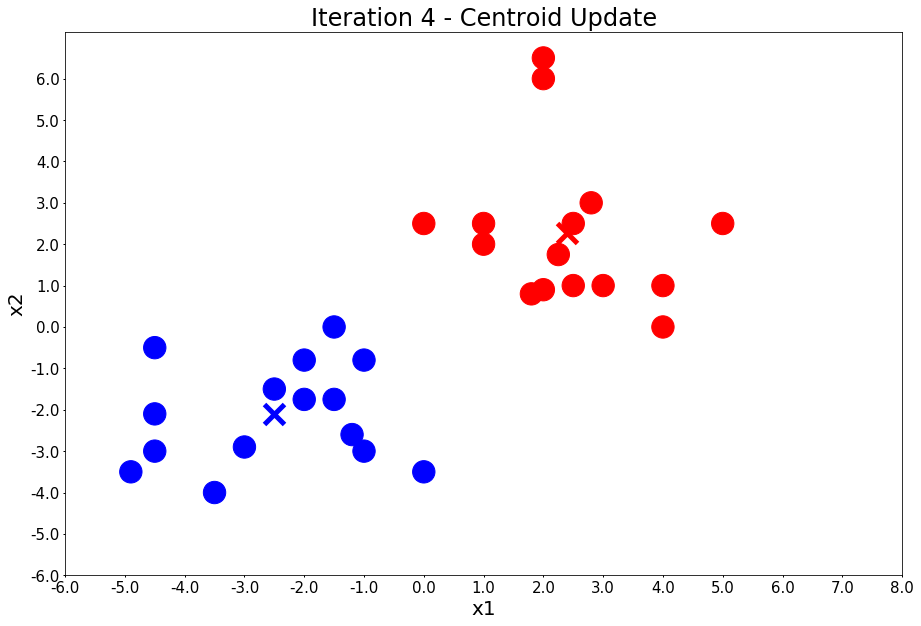

In [9]:
iterations = 4
for i in range(iterations):
    colors, class_of_points = assign_members(x1, x2, centers)
    title = 'Iteration {} - Cluster Assignment'.format(i + 1)
    plot_points(centers, colors, figure_title=title)
    centers = update_centers(x1, x2, class_of_points)
    title = 'Iteration {} - Centroid Update'.format(i + 1)
    plot_points(centers, colors, figure_title=title)

#### PART 3: K-MEANS CLUSTER RANDOMLY GENERATED DATA

In [10]:
from sklearn.cluster import KMeans
from sklearn.datasets.samples_generator import make_blobs

In [11]:
np.random.seed(0)
centers = [[4, 4], [-2, -1], [2, -3], [1, 1]]
x, y = make_blobs(n_samples=5000, centers=centers, cluster_std=0.9)

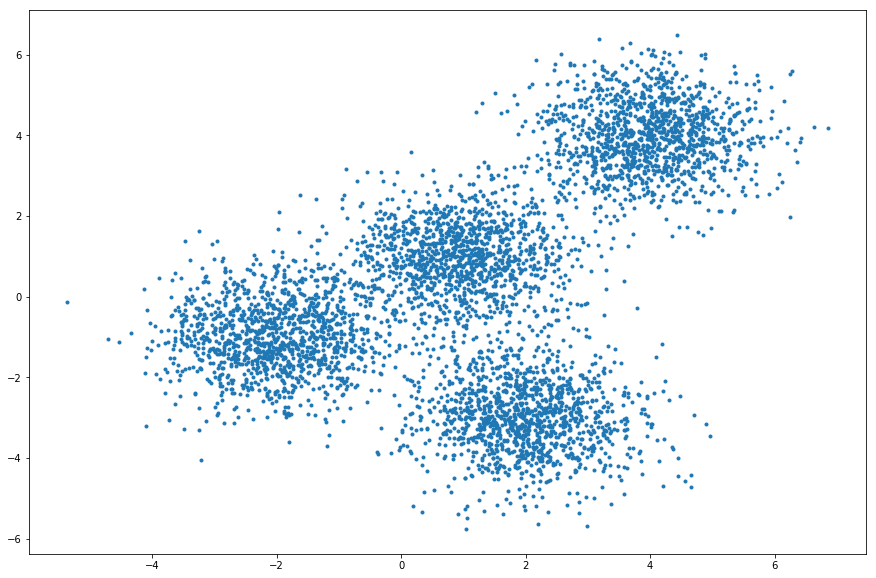

In [12]:
plt.figure(figsize=(15, 10))
plt.scatter(x[:, 0], x[:, 1], marker='.')

In [13]:
k_means = KMeans(init='k-means++', n_clusters=4, n_init=12)
k_means.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=12, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [14]:
k_means_labels = k_means.labels_
k_means_labels

array([0, 3, 3, ..., 1, 0, 0], dtype=int32)

In [15]:
k_means_cluster_centers = k_means.cluster_centers_
k_means_cluster_centers

array([[-2.03743147, -0.99782524],
       [ 3.97334234,  3.98758687],
       [ 0.96900523,  0.98370298],
       [ 1.99741008, -3.01666822]])

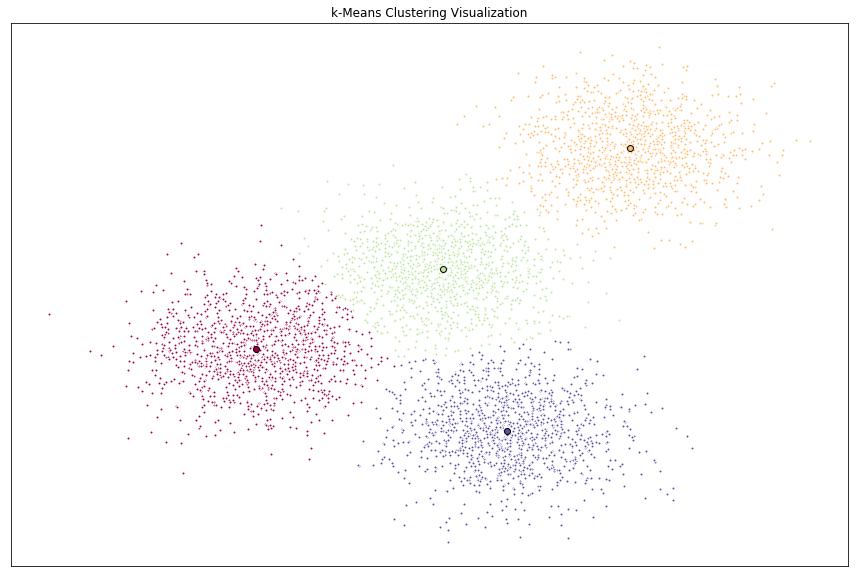

In [16]:
fig = plt.figure(figsize=(15, 10))
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means_labels))))
ax = fig.add_subplot(1, 1, 1)

for k, col in zip(range(len(centers)), colors):
    members = (k_means_labels == k)
    cluster_center = k_means_cluster_centers[k]
    
    ax.plot(x[members, 0], x[members, 1], 'w', markerfacecolor=col, marker='.')
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)


ax.set_title('k-Means Clustering Visualization')
ax.set_xticks(())
ax.set_yticks(())
plt.show()

#### PART 4: K-MEANS CLUSTERING FOR CUSTOMER SEGMENTATION

In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
!wget -q -O 'customer_segmentation.csv' https://cocl.us/customer_dataset

In [19]:
df = pd.read_csv('customer_segmentation.csv')
df = df.drop('Address', axis=1)
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,5,47,1,31,253,9.308,8.908,0.0,7.2


In [20]:
x = df.values[:,1:]
x = np.nan_to_num(x)
cluster_dataset = StandardScaler().fit_transform(x)
cluster_dataset

array([[ 0.74291541,  0.31212243, -0.37878978, ..., -0.59048916,
        -0.52379654, -0.57652509],
       [ 1.48949049, -0.76634938,  2.5737211 , ...,  1.51296181,
        -0.52379654,  0.39138677],
       [-0.25251804,  0.31212243,  0.2117124 , ...,  0.80170393,
         1.90913822,  1.59755385],
       ...,
       [-1.24795149,  2.46906604, -1.26454304, ...,  0.03863257,
         1.90913822,  3.45892281],
       [-0.37694723, -0.76634938,  0.50696349, ..., -0.70147601,
        -0.52379654, -1.08281745],
       [ 2.1116364 , -0.76634938,  1.09746566, ...,  0.16463355,
        -0.52379654, -0.2340332 ]])

In [21]:
CLUSTERS = 3

k_means = KMeans(init="k-means++", n_clusters=CLUSTERS, n_init=12)
k_means.fit(cluster_dataset)
labels = k_means.labels_
print(labels)

[1 2 0 1 2 2 1 1 1 2 0 1 1 1 0 1 1 1 2 1 1 1 0 2 2 1 1 1 1 1 1 2 0 1 1 1 0
 0 1 2 0 2 1 2 1 2 1 1 1 1 2 2 0 1 0 0 0 1 1 1 2 1 2 2 1 1 1 0 1 0 1 1 1 1
 1 1 1 1 2 1 1 0 2 1 2 1 1 1 0 0 1 1 0 0 1 1 1 1 0 1 0 2 1 0 0 2 1 1 1 1 1
 1 1 0 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 2 1 1 0
 1 1 1 2 0 1 1 1 1 2 0 0 1 2 1 1 1 1 1 1 1 1 2 1 1 0 1 0 1 1 0 2 0 1 1 2 0
 2 1 1 1 1 1 2 1 0 1 1 1 2 2 1 2 1 0 1 1 0 1 2 1 0 1 1 1 1 1 0 0 2 1 1 0 2
 1 1 1 1 2 1 1 0 1 1 1 1 2 1 1 0 2 1 1 1 1 1 1 2 1 2 1 1 1 1 1 1 2 0 1 0 1
 1 1 2 1 0 2 0 1 2 1 1 0 1 1 1 1 0 0 0 1 1 1 2 1 1 2 1 2 1 1 2 1 1 1 0 1 1
 0 1 0 2 1 1 1 1 0 1 1 0 0 1 1 1 1 1 1 1 1 0 1 0 2 1 0 1 1 1 0 0 1 1 1 2 0
 1 1 0 1 2 1 1 1 1 1 0 2 1 1 1 1 1 2 1 1 1 1 1 2 1 1 1 2 0 1 0 1 1 1 2 2 1
 0 1 2 0 0 1 1 1 0 1 1 1 1 1 2 1 2 1 1 1 1 0 1 0 1 1 1 2 1 1 1 1 0 1 1 0 0
 2 1 1 1 1 1 0 0 1 2 0 2 1 1 0 1 1 2 2 1 0 1 1 2 1 0 1 2 1 1 1 2 1 1 1 1 2
 1 0 1 1 1 1 2 0 1 1 2 1 0 1 1 2 1 2 1 1 1 1 1 1 1 2 2 1 1 2 1 0 1 1 1 0 1
 0 1 1 1 1 1 2 0 0 1 2 1 

In [22]:
df["Labels"] = labels
df.groupby('Labels').mean()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
Labels,,,,,,,,,
0,424.451807,31.891566,1.861446,3.963855,31.789157,1.576675,2.843355,0.993939,13.994578
1,426.122905,33.817505,1.603352,7.625698,36.143389,0.853128,1.816855,0.000000,7.964991
2,424.408163,43.000000,1.931973,17.197279,101.959184,4.220673,7.954483,0.162393,13.915646
